#Introduction

# Introduction of Project in breif
#The value of a car drops right from the moment it is bought and the depreciation continues with each passing year.
#In fact, in the first year itself, the value of a car decreases by 20 percent of its initial value. 
#The make and model of a car, total kilometers driven,
#overall condition of the vehicle and various other factors
#further affect the car’s resale value.
#The value of a car drops right from the moment it is bought 
#and the depreciation continues with each passing year. 
#In fact, in the first year itself, 
#the value of a car decreases by 20 percent of its initial value. 
#The make and model of a car,
#total kilometers driven, overall condition of the vehicle and various other factors further affect the car’s resale value

#Import basic libraries & Loda data

In [ ]:
# 1] Import basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 2] Load data
df=pd.read_csv('/content/drive/MyDrive/Machine_Learning_Projects/car data.csv')

# Data Preprocessing

In [ ]:
# To get first five records
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# To get number of Rows & Columns
df.shape

(301, 9)

In [ ]:
# To get properties of dataset
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


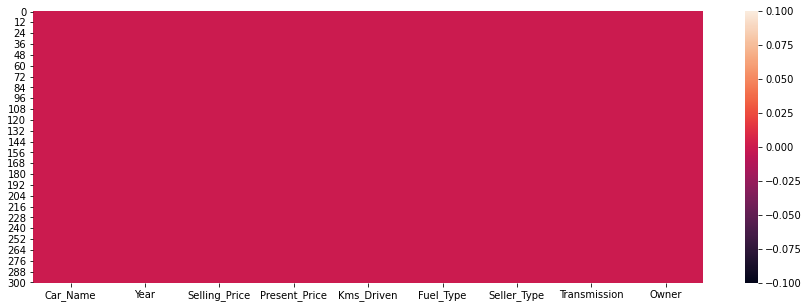

In [ ]:
# Visulization of null values by using Heatmap
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull())
plt.show()

In [ ]:
# Null values in %
df.isnull().sum()/df.shape[0]*100

Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64

In [ ]:
# Add new Column into Data frame
df['Current_year']=2021

In [ ]:
# To check new column added or not
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [ ]:
 new Column into Data frame
df['Age_of_car']=df['Current_year']-df['Year']

In [ ]:
# To check new column added or not
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,Age_of_car
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [ ]:
# Drop unwanted columns
df.drop(['Year','Current_year'],axis=1,inplace=True)

In [ ]:
# To check unwanted columns drop or not
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_car
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [ ]:
# Machine only knows numerical figures.
# In this dataset we have categorical("strings") values also.
# so we need to convert them into numerical values.
# For convertion form categorical values to Numerical values we need to have segrigate such values and put into 
# diffrent diffrent data frames.
df_cat=df.select_dtypes('object')
df_num=df.select_dtypes(['int64','float64'])

In [ ]:
df_num.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_car
0,3.35,5.59,27000,0,7
1,4.75,9.54,43000,0,8
2,7.25,9.85,6900,0,4
3,2.85,4.15,5200,0,10
4,4.60,6.87,42450,0,7


In [ ]:
df_cat.head()

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual


In [ ]:
# Convertion of categorical values to Numerical values.
# we have two methods for such process:
# 1] LabelEncoder
# 2] One Hot Encoder
# Here we will used LabelEncoder
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
le=LabelEncoder()
for col in df_cat:
  df_cat[col]=le.fit_transform(df_cat[col])

In [ ]:
# To check LabelEncoder applicable or not
df_cat.head()

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,90,2,0,1
1,93,1,0,1
2,68,2,0,1
3,96,2,0,1
4,92,1,0,1


In [ ]:
# Crete new data frame by concating categorical & numerical dataframe
df_new=pd.concat([df_num,df_cat],axis=1)

In [ ]:
# Check new data frame
df_new.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_car,Car_Name,Fuel_Type,Seller_Type,Transmission
0,3.35,5.59,27000,0,7,90,2,0,1
1,4.75,9.54,43000,0,8,93,1,0,1
2,7.25,9.85,6900,0,4,68,2,0,1
3,2.85,4.15,5200,0,10,96,2,0,1
4,4.60,6.87,42450,0,7,92,1,0,1


# Correlationship between Data set

In [ ]:
df_new2=df_new.drop('Selling_Price',axis=1)


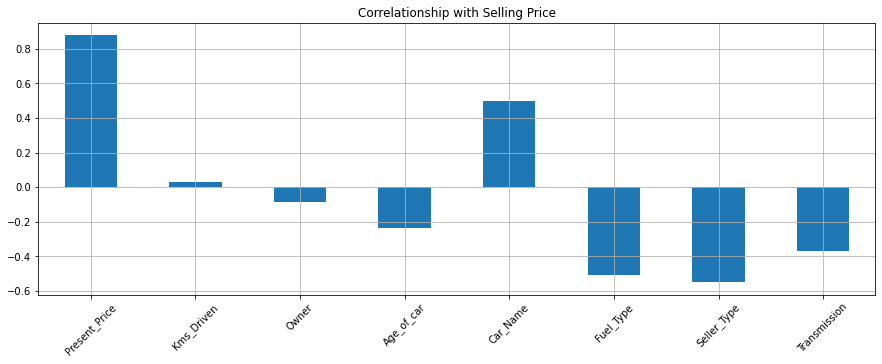

In [ ]:
# By Using BarPlot
df_new2.corrwith(df_new['Selling_Price']).plot.bar(figsize=(15,5),title="Correlationship with Selling Price",grid=True,rot=45)

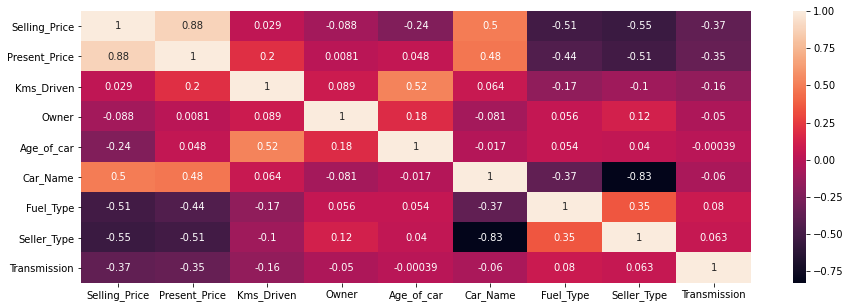

In [ ]:
# By using Heatmap
plt.figure(figsize=(15,5))
sns.heatmap(data=df_new.corr(),annot=True)
plt.show()

# Split data into X & Y

In [ ]:
x=df_new.drop("Selling_Price",axis=1)
y=df_new["Selling_Price"]

 #  Divide data for train(80%) & Test(20%)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

# Scalling Dataset

In [ ]:
# There are two types of Scalling of data:
# 1] MinMax Scaller
# 2] Standard Scaller
# We will apply Standard Scaler to Scale our data set
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

# Training of Model

# 1]LinearRegression

In [ ]:
#1] LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
le=LinearRegression()
le.fit(x_train,y_train)
y_pred=le.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print("Mean_Squared_Error: ",mse)
score=r2_score(y_test,y_pred)
print("R2Score :",score.mean()*100)

Mean_Squared_Error:  2.186818919090265
R2Score : 91.34869106859415


# 2] RandomForestRegressor

In [ ]:
#2] RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
rfc=RandomForestRegressor()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print("Mean_Squared_Error: ",mse)
score=r2_score(y_test,y_pred)
print("R2Score :",score.mean()*100)

Mean_Squared_Error:  1.1662836162295074
R2Score : 95.3860469298317


# 3]XgboostRegressor

In [ ]:
#3]XgboostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print("Mean_Squared_Error: ",mse)
score=r2_score(y_test,y_pred)
print("R2Score :",score.mean()*100)

[03:34:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean_Squared_Error:  1.0162422820530261
R2Score : 95.97962782631538


# Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param={
    'lerning_rate':[0.05,0.1,0.15,0.20,0.25,0.30],
    'max_depth':[3,4,5,6,7,8,10,12,15],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree=1':[0.3,0.4,0.5,0.6]
}

In [ ]:
rsc=RandomizedSearchCV(estimator=xgb,param_distributions=param,n_iter=5,scoring='neg_mean_absolute_error',verbose=3,n_jobs=-1,cv=5)
# important 'neg_mean_absolute_error'

In [ ]:
rsc.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[03:48:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:    1.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree=1': [0.3, 0.4, 0.5,
                                                    

In [ ]:
rsc.best_params_

{'colsample_bytree=1': 0.6,
 'gamma': 0.0,
 'lerning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1}

In [ ]:
rsc.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, colsample_bytree=1=0.6,
             gamma=0.0, importance_type='gain', learning_rate=0.1,
             lerning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

# Final Model

In [ ]:
xgb2=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1,
             gamma=0.0, importance_type='gain', learning_rate=0.1,
             lerning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

In [ ]:
xgb2.fit(x_train,y_train)
y_pred=xgb2.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print("Mean_Squared_Error:",mse)
score=r2_score(y_test,y_pred)
print("R2_Score :",score.mean()*100)

[03:52:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean_Squared_Error: 0.8803443018615089
R2_Score : 96.51725597628582
